In [1]:
import util
import search

In [2]:
# Libraries and code for graph and tree visualization
from graphviz import Graph, Digraph
from IPython.display import display

class search_tree():
    def __init__(self):
        self.graph = Digraph(graph_attr = {'size':'9'})
        
    def addNode(self, name, label):
        self.graph.node(name, label)

    def addEdge(self, source, action, target):
        self.graph.edge(source, target, action)
    
    def getDot(self):
        return self.graph
    
def graphDot(g_prob, color):
    #dot = Graph(graph_attr = {'size':'3.5'})
    dot = Digraph('hola')
    dot.attr(rankdir='LR', size='8,5')
    for node in g_prob.G:
        if not node in color:
            dot.node(node)
        else:
            dot.node(node, style = 'filled', color = color[node])
    for n1 in g_prob.G:
        for n2 in g_prob.G[n1]:
            dot.edge(n1, n2, label=str(g_prob.G[n1][n2]))            
    return dot

# Uniformed Search
## A search problem

In [3]:
class graph_problem(search.SearchProblem):
    def __init__(self, vertices, edges):
        self.G = {v:{} for v in vertices}
        for v1, v2, c in edges1:
            (self.G[v1])[v2] = c
            #(self.G[v2])[v1] = c
        self.start = vertices[0]
        self.goal = vertices[-1]
        
        
    def getStartState(self):
        return self.start

    def isGoalState(self, state):
        return self.goal == state

    def getSuccessors(self, state):
        successors = [(suc, state + '->' + suc, 
                       (self.G[state])[suc]) for suc in self.G[state]]
        return successors

{'G': {}, 'S': {'r': 1, 'w': 1}, 'r': {'v': 1}, 'u': {'G': 1}, 't': {'x': 1, 'u': 1}, 'w': {'x': 1, 't': 1}, 'v': {}, 'x': {'G': 1}}
{'x': 1, 't': 1}
S
False

Space-State graph


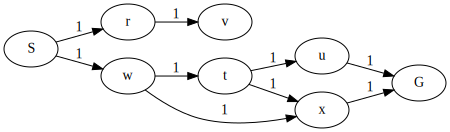

In [4]:
edges1 = [('S','r',1), ('S','w',1), ('r','v',1), ('w','t',1), ('w','x',1), ('t','u',1), ('t','x',1), ('x','G',1), ('u','G',1)]
vertices1 = ['S', 'r', 't', 'u', 'v', 'w', 'x', 'G'] 
problem1 = graph_problem(vertices1, edges1)
print problem1.G
print problem1.G['w']
print problem1.getStartState()
print problem1.isGoalState('y')
dot = graphDot(problem1, {})
print "\nSpace-State graph"
display(dot)

## General graph search

In [5]:
def general_ui_search(problem, frontier):
    #visited = {}
    visited = []
    tree = search_tree()
    state = problem.getStartState()
    frontier.push((state, []))
    #visited[state] = 'gray'
    while not frontier.isEmpty():
        u, actions = frontier.pop()
#        print 'Pop:', u 
        if problem.isGoalState(u):            
            return  actions, tree
        if not u in visited:
            visited.append(u)
            for v, action, cost in problem.getSuccessors(u):
                if not v in visited:
                    tree.addEdge(str(u), action, str(v))                
                    frontier.push((v, actions + [action]))
        # display(graphDot(problem, visited))
        print "\nExpanding parent node "+u
        print "Fringe: "+ str([frontier.__dict__['list'][x][0] for x in range(len(frontier.__dict__['list']))])
        display(tree.getDot())
        #visited[u] = 'black'
    return [], tree

## Depth-first search

In [6]:
def dfs(problem):
   return general_ui_search(problem, util.Stack())


Expanding parent node S
Fringe: ['r', 'w']


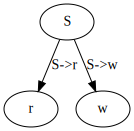


Expanding parent node w
Fringe: ['r', 'x', 't']


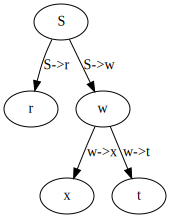


Expanding parent node t
Fringe: ['r', 'x', 'x', 'u']


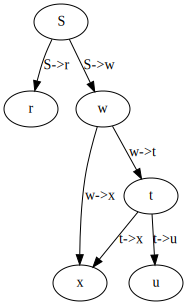


Expanding parent node u
Fringe: ['r', 'x', 'x', 'G']


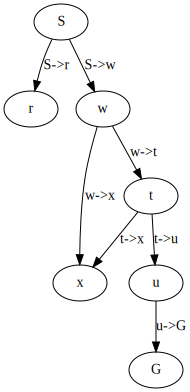

Path to goal found: 
['S->w', 'w->t', 't->u', 'u->G']


In [7]:
actions, tree = dfs(problem1)
print "Path to goal found: "
print actions
#display(tree.getDot())

## Breath-first Search

In [8]:
def bfs(problem):
   return general_ui_search(problem, util.Queue())


Expanding parent node S
Fringe: ['w', 'r']


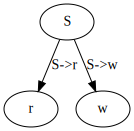


Expanding parent node r
Fringe: ['v', 'w']


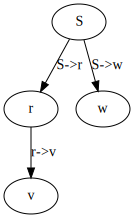


Expanding parent node w
Fringe: ['t', 'x', 'v']


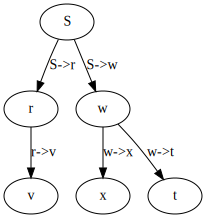


Expanding parent node v
Fringe: ['t', 'x']


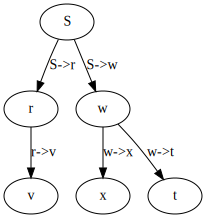


Expanding parent node x
Fringe: ['G', 't']


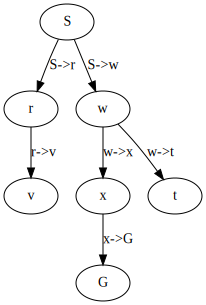


Expanding parent node t
Fringe: ['u', 'G']


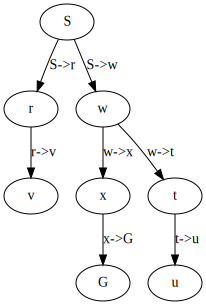

['S->w', 'w->x', 'x->G']


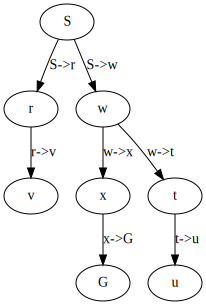

In [9]:
actions1, tree1 = bfs(problem1)
print actions1
display(tree1.getDot())

## Uniform cost search


Space-State graph


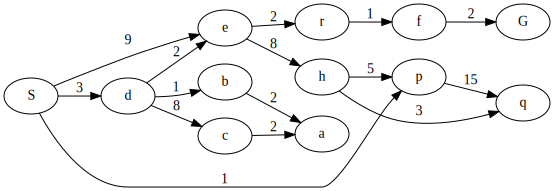

In [10]:
edges1 = [('S','d',3), ('S','e',9), ('S','p',1), ('d','b',1), ('d','c',8), ('b','a',2), ('c','a',2), ('d','e',2), ('e','h',8), ('h','p',5), ('h','q',3), 
          ('p','q',15), ('e','r',2), ('r','f',1), ('f','G',2)]
vertices1 = ['S', 'd', 'p', 'q', 'h', 'e', 'b', 'c', 'a', 'r', 'f', 'G'] 
problem1 = graph_problem(vertices1, edges1)
dot = graphDot(problem1, {})
print "\nSpace-State graph"
display(dot)

In [11]:
def general_search(problem, frontier):
    visited = []
    state = problem.getStartState()
    frontier.push((state, [], 0))
    tree = search_tree()
    tree.addNode(str(state)+"[]",str(state))
    while not frontier.isEmpty():
        u, actions, path_cost = frontier.pop()
        if problem.isGoalState(u):
            return  actions, tree
        if not u in visited:
            visited.append(u)
            for v, action, cost in problem.getSuccessors(u):
                if v not in visited:
                    tree.addNode(str(v) + str(actions+[action]), str(v))
                    tree.addEdge(str(u) + str(actions), str(cost), str(v) + str(actions+[action]))
                    frontier.push((v, actions + [action], path_cost + cost))
            print "\nExpanding parent node "+u
            print "Fringe: "+ str([frontier.__dict__['heap'][x][2][0] for x in range(len(frontier.__dict__['heap']))])
            display(tree.getDot())
        #visited[u] = 'black'
    return [], tree

def uniformCostSearch(problem):
    def g_cost(item):
        return item[2]
    return general_search(problem, util.PriorityQueueWithFunction(g_cost))


Expanding parent node S
Fringe: ['p', 'e', 'd']


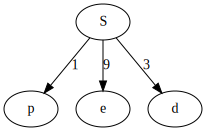


Expanding parent node p
Fringe: ['d', 'e', 'q']


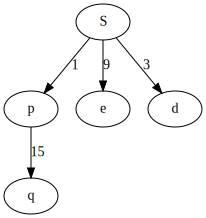


Expanding parent node d
Fringe: ['b', 'e', 'c', 'q', 'e']


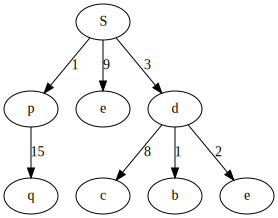


Expanding parent node b
Fringe: ['e', 'a', 'c', 'q', 'e']


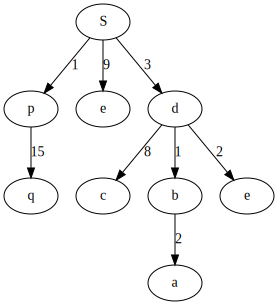


Expanding parent node e
Fringe: ['a', 'e', 'r', 'q', 'h', 'c']


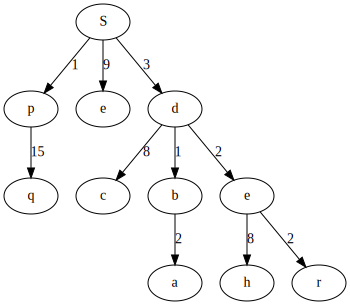


Expanding parent node a
Fringe: ['r', 'e', 'c', 'q', 'h']


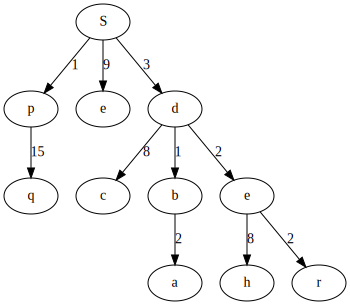


Expanding parent node r
Fringe: ['f', 'e', 'c', 'q', 'h']


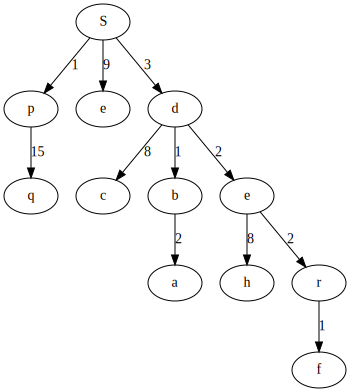


Expanding parent node f
Fringe: ['e', 'G', 'c', 'q', 'h']


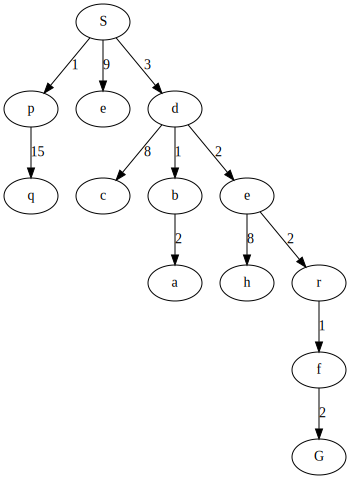

['S->d', 'd->e', 'e->r', 'r->f', 'f->G']


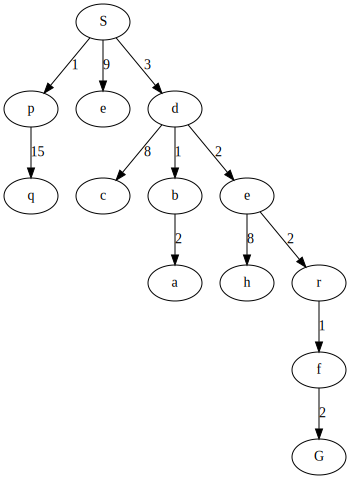

In [12]:
actions2, tree2 = uniformCostSearch(problem1)
print actions2
display(tree2.getDot())